<a href="https://colab.research.google.com/github/manikbali/gsics/blob/main/Copy_of_Heatmap_SOS_Charts_Working.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#GSICS State of Observing System Charts for Multiple Satellites


*By Manik Bali, ESSIC/UMD*

We present here a python platform built on Google Colab, aimed to help users use construct charts for State of Observing System Report.
There are three types of charts this script would build
1. Mean bias per channel between specified start and end dates
2. Time series of biases
3. Drifts

Input
The script takes GSICS RAC product as input. The input is provided in the form of list of Monitored instrument and corresponding Reference Instrument picked up from a single row of the product catalog. Ref and Monitored instruments acronyms of the Product catalog are used to construct the input list.  

**References**

EUMETSAT GSICS Product User Guide [link](https://www.eumetsat.int/website/wcm/idc/idcplg?IdcService=GET_FILE&dDocName=PDF_DMT_803180&RevisionSelectionMethod=LatestReleased&Rendition=Web)


**How to use this Notebook for the product you are interested in**

This notebook is for Product Type Re-Analysis Correction. For Product Type Near Real Time Correction click [here](https://colab.research.google.com/drive/18SjLpebRKPdEBT_eYuZrEGTQNo82gpn4)
1.   Make a copy of this notebook Click File-> Save a Copy in Drive
2.   Select the product/s from [product catalog](https://www.star.nesdis.noaa.gov/smcd/GCC/ProductCatalog.php) ( RAC product only) and pick the monitored and reference instrument acronyms and put these in the list ( **monlist** and **reflist**) below. Select multiple products by selecting their monitored and reference instruments and add them onto the monlist/reflist
3.  Under Runtime press Run All


monlist=List of acronyms of monitored instrument  pitcked from product catalog ( e.g. MSG-4 SEVIRI )


reflist=List of acronyms of reference instrument  picked from product catalog( e.g IASI-A)

**Sample**

monlist=['MSG-4 SEVIRI','MSG-3 SEVIRI']

reflist=['IASI-A','IASI-B']

**Enter startdate ='yyyymmdd' and enddate='yyyymmdd'**
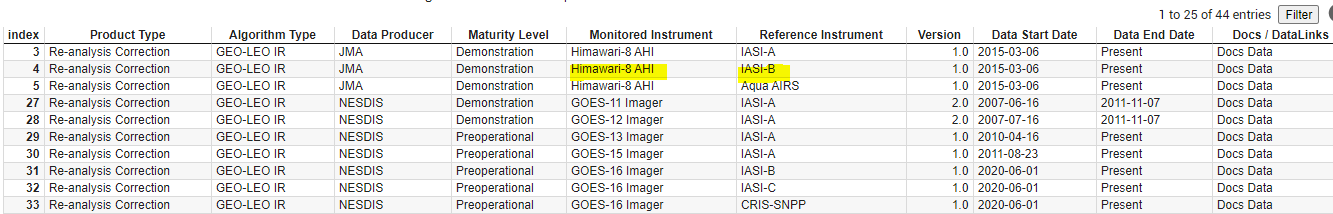

In [ ]:
#%unload_ext google.colab.data_table
%load_ext google.colab.data_table
#%reload_ext google.colab.data_table
import requests
import pandas as pd
url = 'https://www.star.nesdis.noaa.gov/smcd/GCC/ProductCatalog.php' # URL of Product Catalog
html = requests.get(url).content
df_list = pd.read_html(html)
print("Select Monitored and Reference instrument from Product Catalog Table below and input them in monlist and reflist in the next cell")
tempdf=df_list[0].loc[df_list[0]['Product Type'].str.contains("analysis", case=False)]
productlist=tempdf[~tempdf['Product Type'].str.contains("dcc", case=False)]
productlist

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table
Select Monitored and Reference instrument from Product Catalog Table below and input them in monlist and reflist in the next cell


,Product Type,Algorithm Type,Data Producer,Maturity Level,Monitored Instrument,Reference Instrument,Version,Data Start Date,Data End Date,Docs / Data Links
5,Re-analysis Correction,GEO-LEO IR,JMA,Demonstration,Himawari-8 AHI,IASI-A,1.0,2015-03-06,2021-10-15,Docs Data
6,Re-analysis Correction,GEO-LEO IR,JMA,Demonstration,Himawari-8 AHI,IASI-B,1.0,2015-03-06,2022-11-29,Docs Data
7,Re-analysis Correction,GEO-LEO IR,JMA,Demonstration,Himawari-9 AHI,IASI-B,1.0,2022-09-27,Present,Docs Data
8,Re-analysis Correction,GEO-LEO IR,JMA,Demonstration,Himawari-8 AHI,Aqua AIRS,1.0,2015-03-06,2022-11-29,Docs Data
9,Re-analysis Correction,GEO-LEO IR,JMA,Demonstration,Himawari-9 AHI,Aqua AIRS,1.0,2022-09-27,Present,Docs Data
27,Prime Re-analysis correction,GEO-LEO Prime IR,EUMETSAT,Demonstration,MSG-1 SEVIRI,IASI-A,0.0,2008-06-01,2021-09-11,Docs Data
28,Prime Re-analysis correction,GEO-LEO Prime IR,EUMETSAT,Demonstration,MSG-2 SEVIRI,IASI-A,0.0,2008-06-01,2021-09-11,Docs Data
29,Prime Re-analysis correction,GEO-LEO Prime IR,EUMETSAT,Demonstration,MSG-3 SEVIRI,IASI-A,0.0,2012-08-12,2021-09-11,Docs Data
30,Prime Re-analysis correction,GEO-LEO Prime IR,EUMETSAT,Demonstration,MSG-4 SEVIRI,IASI-A,0.0,2015-09-08,2021-09-11,Docs Data
31,Re-analysis Correction,GEO-LEO IR,NESDIS,Demonstration,GOES-11 Imager,IASI-A,2.0,2007-06-16,2011-11-07,Docs Data


In [ ]:
#Visit the Product Catalog and copy paste the acronmys of Reference and Monitored instrument used there into the list below
#https://www.star.nesdis.noaa.gov/smcd/GCC/ProductCatalog.php
url = 'https://www.star.nesdis.noaa.gov/smcd/GCC/ProductCatalog.php' # URL of Product Catalog
#monlist=['Himawari-8 AHI','Himawari-8 AHI'] # Monitored instrument list. No limit to number of instruments you can specify
#reflist=['IASI-A','IASI-B'] # corresponding Reference instrument list. No limit to number of instruments you can specify
monlist=['MSG-2 SEVIRI','MSG-3 SEVIRI','MSG-4 SEVIRI','Himawari-9 AHI','GK2A']
reflist=['IASI-B']
#2008-06-01	2021-11-16
startdate = '20240101' # Start date
enddate='20241231' # Enddate
lifetime='no' # lifetime ='yes' if you wish to computes mean bias, standard deviation and drift over the life time of the product. Start and end dates are ignored if done so.
flag='rac' # flag values RAC and Prime only

In [ ]:
#Build dataframe of product catalog with catalog.html hyperlinks in it
import requests
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import urllib.request

html = requests.get(url).content
df_list = pd.read_html(html)
df = df_list[-1]
headers = {    'Access-Control-Allow-Origin': '*',
    'Access-Control-Allow-Methods': 'GET',
    'Access-Control-Allow-Headers': 'Content-Type',
    'Access-Control-Max-Age': '3600',
    'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:52.0) Gecko/20100101 Firefox/52.0'
    }

req = requests.get(url, headers)
soup = BeautifulSoup(req.content, 'html.parser')

parsed_table = soup.find_all('table')[0]
a=parsed_table.find_all('a',attrs = {"class": "NoImage"})
catfiles=pd.DataFrame([str(sfile).split(' ')[4].split('=')[1].split('>')[0][1:-1] for sfile in a[1:(len(a)+2):2]],columns=['caturls'])
catdf=pd.concat([df_list[0],catfiles],axis=1)

if(flag.lower()=='rac'):
  finaldf=catdf.loc[df['Product Type'].str.contains("analysis", case=False)]
  finaldf=finaldf[~finaldf['Product Type'].str.contains("prime", case=False)]
if(flag.lower()=='prime'):
  finaldf=catdf.loc[df['Product Type'].str.contains("prime", case=False)]
finaldf.set_index(['Monitored Instrument','Reference Instrument'],inplace=True)
#finaldf

In [ ]:
print("List of Selected Products for this session[ Taken from Product Catalog]")
finaldf.loc[(monlist,reflist),:]

List of Selected Products for this session[ Taken from Product Catalog]


,,Product Type,Algorithm Type,Data Producer,Maturity Level,Version,Data Start Date,Data End Date,Docs / Data Links,caturls
Monitored Instrument,Reference Instrument,,,,,,,,,
MSG-2 SEVIRI,IASI-B,Re-analysis Correction,GEO-LEO IR,EUMETSAT,Operational,1.0,2013-01-10,Present,Docs Data,http://gsics.eumetsat.int/thredds/catalog/msg2...
MSG-3 SEVIRI,IASI-B,Re-analysis Correction,GEO-LEO IR,EUMETSAT,Operational,1.0,2013-01-10,Present,Docs Data,http://gsics.eumetsat.int/thredds/catalog/msg3...
MSG-4 SEVIRI,IASI-B,Re-analysis correction,GEO-LEO IR,EUMETSAT,Operational,1.0,6/1/2015,Present,Docs Data,http://gsics.eumetsat.int/thredds/catalog/msg4...
Himawari-9 AHI,IASI-B,Re-analysis Correction,GEO-LEO IR,JMA,Demonstration,1.0,2022-09-27,Present,Docs Data,http://gsics.eumetsat.int/thredds/catalog/hima...
GK2A,IASI-B,Re-analysis Correction,GEO-LEO IR,KMA,Demo,0.0,04/18/2020,Present,Docs Data,https://gsics.eumetsat.int/thredds/catalog/gk2...


In [ ]:
#Extract hyperlinks of the product files
#select the latest files and ignore the rest
urls=list(finaldf.loc[(monlist,reflist),:]['caturls'].values )

latestfiles=[pd.DataFrame(pd.read_html(requests.get(catalogs).content)[-1]).set_index(['Last Modified']).values[-1][0] for catalogs in urls] #get the most recently modifies filename

#list(finaldf.loc[('MSG-4 SEVIRI',['IASI-A']),:]['caturls'].values )
fileurls=[]
print( "List of All the files on the catalog.html: Only the latest ones would be picked up" )
for url in urls:
  basen=url.split('/')
  basen.insert(basen.index('thredds')+1,'fileServer')
  basen.remove("catalog")
  s='/'
  req = requests.get(url, headers)
  soup = BeautifulSoup(req.content, 'html.parser')
  urllist=[]
  filelist=[]
  nrtfiles=[]
#  print(basen)
  testbasen=basen.copy()
  for a in soup.find_all('a', href=True):
        if((np.size(a['href'].split('/')) ==2 )  ):
              fname=a.text
              basen[-1] = a.text
#              print(basen)
              print(s.join(basen))

              fileurl=s.join(basen)
              urllist.append(fileurl)
              if( fname in latestfiles):
                fileurls.append(fileurl)
              filelist.append(a.text)
              urllib.request.urlretrieve(fileurl, fname)
#              break

List of All the files on the catalog.html: Only the latest ones would be picked up
http://gsics.eumetsat.int/thredds/fileServer/msg2-seviri-metopb-iasi-oper-rac/W_XX-EUMETSAT-Darmstadt,SATCAL+RAC+GEOLEOIR,MSG2+SEVIRI-MetOpB+IASI_C_EUMG_20130110000000_01.nc
http://gsics.eumetsat.int/thredds/fileServer/msg3-seviri-metopb-iasi-oper-rac/W_XX-EUMETSAT-Darmstadt,SATCAL+RAC+GEOLEOIR,MSG3+SEVIRI-MetOpB+IASI_C_EUMG_20130110000000_01.nc
http://gsics.eumetsat.int/thredds/fileServer/msg4-seviri-metopb-iasi-oper-rac/W_XX-EUMETSAT-Darmstadt,SATCAL+RAC+GEOLEOIR,MSG4+SEVIRI-MetOpB+IASI_C_EUMG_20150601000000_01.nc
http://gsics.eumetsat.int/thredds/fileServer/himawari9-ahi-metopb-iasi-demo-rac/W_JP-JMA-MSC,SATCAL+RAC+GEOLEOIR,Himawari9+AHI-MetopB+IASI_C_RJTD_20170128000000_demo_01.nc
https://gsics.eumetsat.int/thredds/fileServer/gk2a-ami-metopb-iasi-demo-rac/W_KR-KMA-NMSC,SATCAL+RAC+GEOLEOIR,GK2A+AMI-MetopB+IASI_C_RKSL_20200418000000_demo_01.nc
https://gsics.eumetsat.int/thredds/fileServer/gk2a-ami-meto

In [ ]:
print("List of selected files on the catalog.html for calculating bias and drift. The most recently modifies files are selected")
print("Files with the most recent modification date would be picked up. ")
print("If you wish to make your own selection comment out the line below and enter your own url's")

#fileurl=['url1','url2'..]
fileurls


List of selected files on the catalog.html for calculating bias and drift. The most recently modifies files are selected
Files with the most recent modification date would be picked up. 
If you wish to make your own selection comment out the line below and enter your own url's


['http://gsics.eumetsat.int/thredds/fileServer/msg2-seviri-metopb-iasi-oper-rac/W_XX-EUMETSAT-Darmstadt,SATCAL+RAC+GEOLEOIR,MSG2+SEVIRI-MetOpB+IASI_C_EUMG_20130110000000_01.nc',
 'http://gsics.eumetsat.int/thredds/fileServer/msg3-seviri-metopb-iasi-oper-rac/W_XX-EUMETSAT-Darmstadt,SATCAL+RAC+GEOLEOIR,MSG3+SEVIRI-MetOpB+IASI_C_EUMG_20130110000000_01.nc',
 'http://gsics.eumetsat.int/thredds/fileServer/msg4-seviri-metopb-iasi-oper-rac/W_XX-EUMETSAT-Darmstadt,SATCAL+RAC+GEOLEOIR,MSG4+SEVIRI-MetOpB+IASI_C_EUMG_20150601000000_01.nc',
 'http://gsics.eumetsat.int/thredds/fileServer/himawari9-ahi-metopb-iasi-demo-rac/W_JP-JMA-MSC,SATCAL+RAC+GEOLEOIR,Himawari9+AHI-MetopB+IASI_C_RJTD_20170128000000_demo_01.nc',
 'https://gsics.eumetsat.int/thredds/fileServer/gk2a-ami-metopb-iasi-demo-rac/W_KR-KMA-NMSC,SATCAL+RAC+GEOLEOIR,GK2A+AMI-MetopB+IASI_C_RKSL_20190725000000_demo_01.nc']

In [ ]:
!pip install netCDF4
!pip install julian
!pip install cftime
import warnings
warnings.filterwarnings('ignore')
import netCDF4 as nc4
import matplotlib.pyplot as plt
import julian,os
from cftime import num2pydate
from datetime import datetime
from tabulate import tabulate
from IPython.display import display, HTML


http://gsics.eumetsat.int/thredds/fileServer/msg2-seviri-metopb-iasi-oper-rac/W_XX-EUMETSAT-Darmstadt,SATCAL+RAC+GEOLEOIR,MSG2+SEVIRI-MetOpB+IASI_C_EUMG_20130110000000_01.nc
MONINST MSG2 SEVIRI
19723 15715 20088 20142
MSGTB1 [ 0.48925218 -0.12096404  0.0595444  -0.05481915 -0.1756114  -0.01768047
 -0.04706062 -0.9907107 ]
MSGTB2 [ 0.48925218 -0.12096404  0.          0.0595444  -0.05481915 -0.1756114
 -0.01768047 -0.04706062  0.         -0.9907107 ]
DRIFT1 [-0.09456848 -0.20307854 -0.16764066 -0.06496769 -0.22979919 -0.07866112
 -0.08167953 -0.24312589]
DRIFT2 {}
[MSG2 SEVIRI - MetOpB IASI]


,3.893 μm,6.248 μm,7.351 μm,8.706 μm,9.659 μm,10.733 μm,11.955 μm,13.302 μm
Standard Scene Temp (K),284.000000,236.000000,255.000000,284.000000,261.000000,286.000000,285.000000,267.000000
Tb Bias (K),0.489252,-0.120964,0.059544,-0.054819,-0.175611,-0.017680,-0.047061,-0.990711
Std Dev (K),0.045936,0.103603,0.092371,0.046481,0.108452,0.044679,0.049339,0.100930
Drift (K),-0.094568,-0.203079,-0.167641,-0.064968,-0.229799,-0.078661,-0.081680,-0.243126


http://gsics.eumetsat.int/thredds/fileServer/msg3-seviri-metopb-iasi-oper-rac/W_XX-EUMETSAT-Darmstadt,SATCAL+RAC+GEOLEOIR,MSG3+SEVIRI-MetOpB+IASI_C_EUMG_20130110000000_01.nc
MONINST MSG3 SEVIRI
19723 15715 20088 20142
MSGTB1 [ 0.6408625  -0.18273081  0.05696792 -0.06909699  0.00738819  0.02014335
  0.00419039 -0.8591434 ]
MSGTB2 [ 0.6408625  -0.18273081  0.          0.05696792 -0.06909699  0.00738819
  0.02014335  0.00419039  0.         -0.8591434 ]
DRIFT1 [-0.01199152 -0.08501918 -0.0694664   0.02876263  0.00723493 -0.01264484
 -0.01991723 -0.11558261]
DRIFT2 {'MSG2 SEVIRI': array([-0.09456848, -0.20307854,  0.        , -0.16764066, -0.06496769,
       -0.22979919, -0.07866112, -0.08167953,  0.        , -0.24312589])}
[MSG3 SEVIRI - MetOpB IASI]


,3.925 μm,6.267 μm,7.351 μm,8.71 μm,9.664 μm,10.755 μm,11.924 μm,13.322 μm
Standard Scene Temp (K),284.000000,236.000000,255.000000,284.000000,261.000000,286.000000,285.000000,267.000000
Tb Bias (K),0.640863,-0.182731,0.056968,-0.069097,0.007388,0.020143,0.004190,-0.859143
Std Dev (K),0.012499,0.043379,0.047957,0.035718,0.038509,0.020367,0.017139,0.044285
Drift (K),-0.011992,-0.085019,-0.069466,0.028763,0.007235,-0.012645,-0.019917,-0.115583


http://gsics.eumetsat.int/thredds/fileServer/msg4-seviri-metopb-iasi-oper-rac/W_XX-EUMETSAT-Darmstadt,SATCAL+RAC+GEOLEOIR,MSG4+SEVIRI-MetOpB+IASI_C_EUMG_20150601000000_01.nc
MONINST MSG4 SEVIRI
19723 16587 20088 20142
MSGTB1 [ 0.02234583 -0.12430573  0.12768732  0.1299949   0.18078512  0.0900268
 -0.0859904  -0.75586265]
MSGTB2 [ 0.02234583 -0.12430573  0.          0.12768732  0.1299949   0.18078512
  0.0900268  -0.0859904   0.         -0.75586265]
DRIFT1 [nan nan nan nan nan nan nan nan]
DRIFT2 {'MSG2 SEVIRI': array([-0.09456848, -0.20307854,  0.        , -0.16764066, -0.06496769,
       -0.22979919, -0.07866112, -0.08167953,  0.        , -0.24312589]), 'MSG3 SEVIRI': array([-0.01199152, -0.08501918,  0.        , -0.0694664 ,  0.02876263,
        0.00723493, -0.01264484, -0.01991723,  0.        , -0.11558261])}
[MSG4 SEVIRI - MetOpB IASI]


,3.913 μm,6.265 μm,7.344 μm,8.715 μm,9.663 μm,10.74 μm,11.917 μm,13.359 μm
Standard Scene Temp (K),284.000000,236.000000,255.000000,284.000000,261.000000,286.000000,285.000000,267.000000
Tb Bias (K),0.022346,-0.124306,0.127687,0.129995,0.180785,0.090027,-0.085990,-0.755863
Std Dev (K),0.059242,0.082352,0.130671,0.119809,0.186850,0.075044,0.078339,0.176808
Drift (K),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


http://gsics.eumetsat.int/thredds/fileServer/himawari9-ahi-metopb-iasi-demo-rac/W_JP-JMA-MSC,SATCAL+RAC+GEOLEOIR,Himawari9+AHI-MetopB+IASI_C_RJTD_20170128000000_demo_01.nc
MONINST Himawari-9 AHI
19723 17208 20088 20139
[Himawari-9 AHI - Metop-B IASI]


,3.826 μm,6.219 μm,6.95 μm,7.342 μm,8.589 μm,9.623 μm,10.402 μm,11.196 μm,12.342 μm,13.304 μm
Standard Scene Temp (K),286.019989,234.750000,244.199997,254.770004,283.880005,259.329987,286.220001,286.160004,283.920013,268.529999
Tb Bias (K),-0.003002,-0.189425,0.006986,-0.123941,-0.096074,-0.225049,-0.065266,-0.077558,-0.101592,-0.195267
Std Dev (K),0.007917,0.013048,0.012741,0.017175,0.015148,0.016798,0.021318,0.021873,0.019700,0.016033
Drift (K),-0.001117,-0.019967,-0.028888,-0.018702,-0.008064,-0.008730,-0.002310,0.002762,-0.001332,-0.006569


https://gsics.eumetsat.int/thredds/fileServer/gk2a-ami-metopb-iasi-demo-rac/W_KR-KMA-NMSC,SATCAL+RAC+GEOLEOIR,GK2A+AMI-MetopB+IASI_C_RKSL_20190725000000_demo_01.nc
MONINST GK2A AMI
19723 18102 20088 20141
[GK2A AMI - MetOpB IASI]


,3.827 μm,6.182 μm,6.937 μm,7.325 μm,8.584 μm,9.616 μm,10.35 μm,11.214 μm,12.336 μm,13.284 μm
Standard Scene Temp (K),285.970001,234.979996,244.089996,254.559998,283.750000,259.059998,286.010010,286.079987,283.779999,269.380005
Tb Bias (K),0.048472,-0.004025,-0.178652,-0.039029,0.009428,-0.105262,0.072612,0.078746,0.066086,0.000033
Std Dev (K),0.006398,0.012257,0.010351,0.012616,0.012131,0.016267,0.014892,0.015137,0.011937,0.009248
Drift (K),0.000209,-0.023626,-0.019165,-0.030045,-0.022632,-0.039845,-0.013064,-0.019299,-0.017376,-0.021637


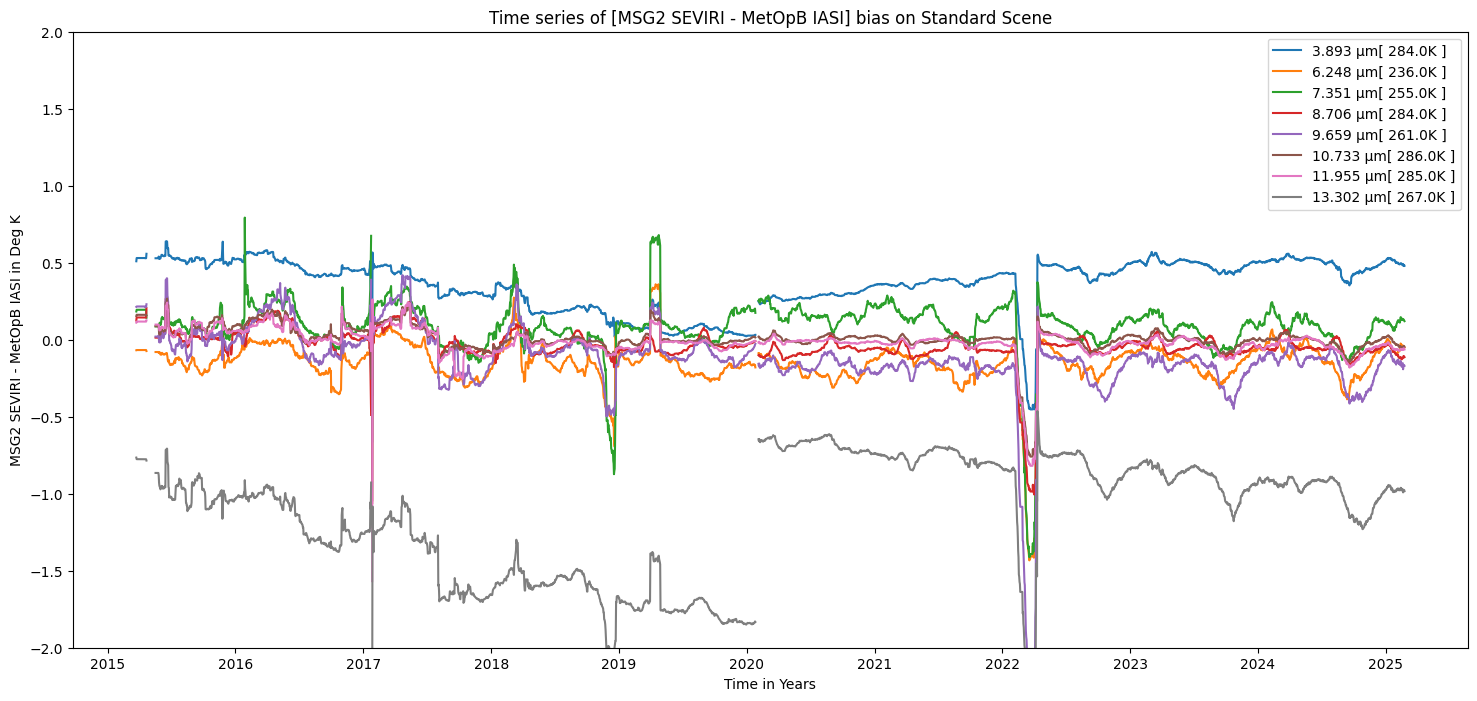

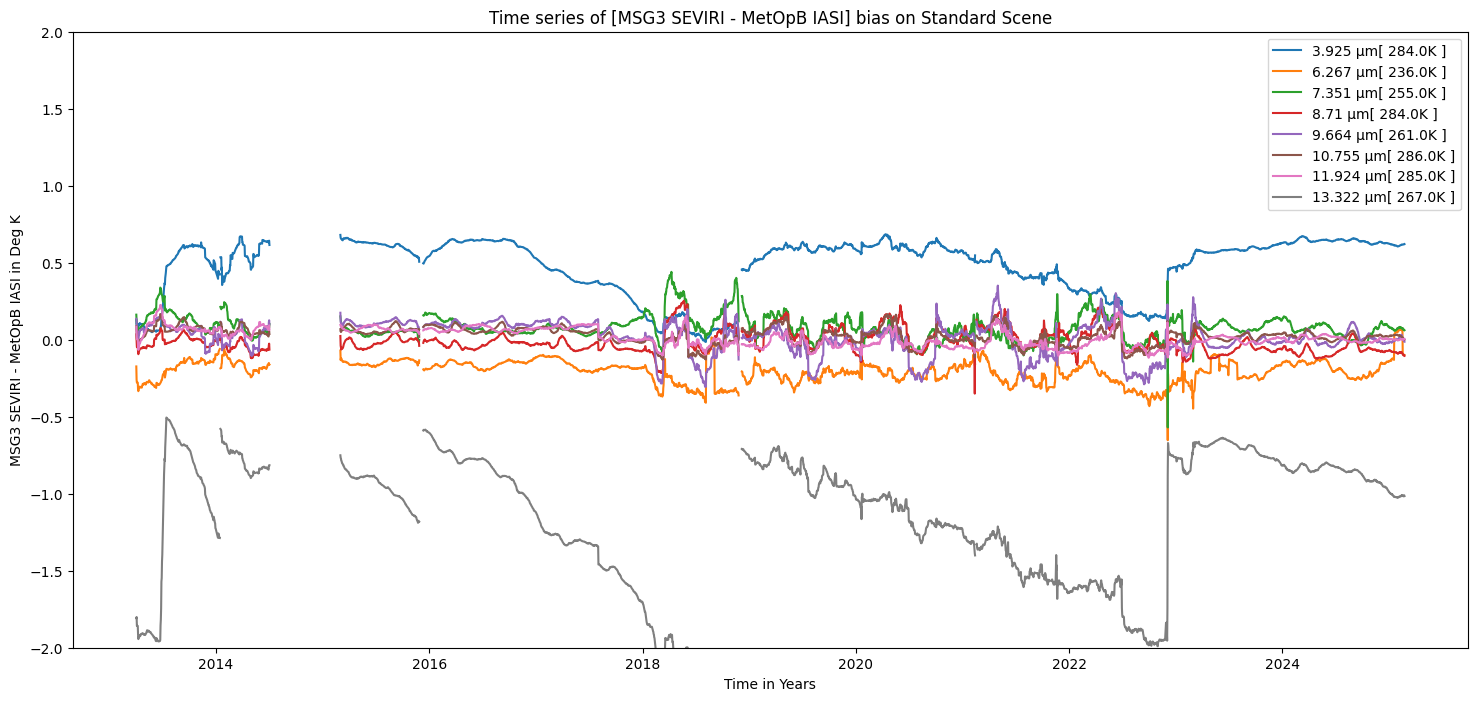

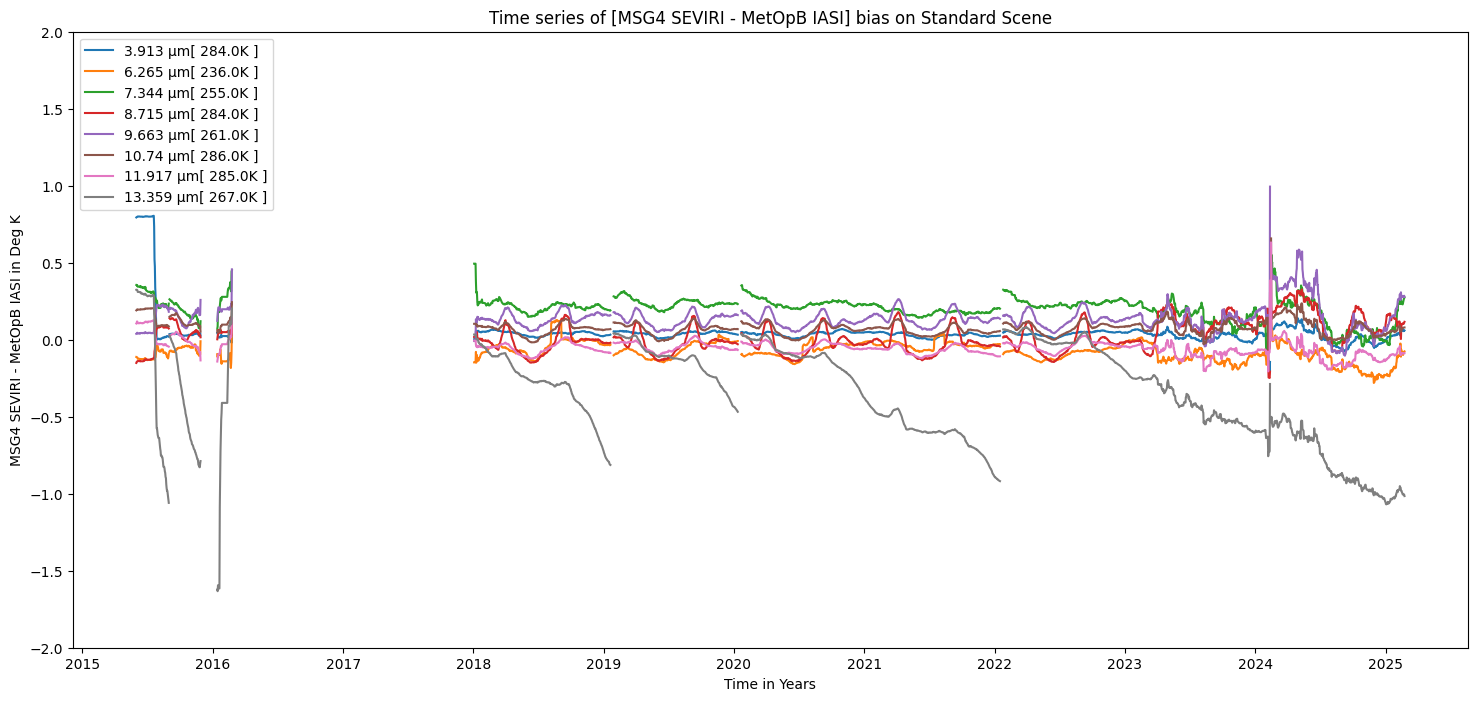

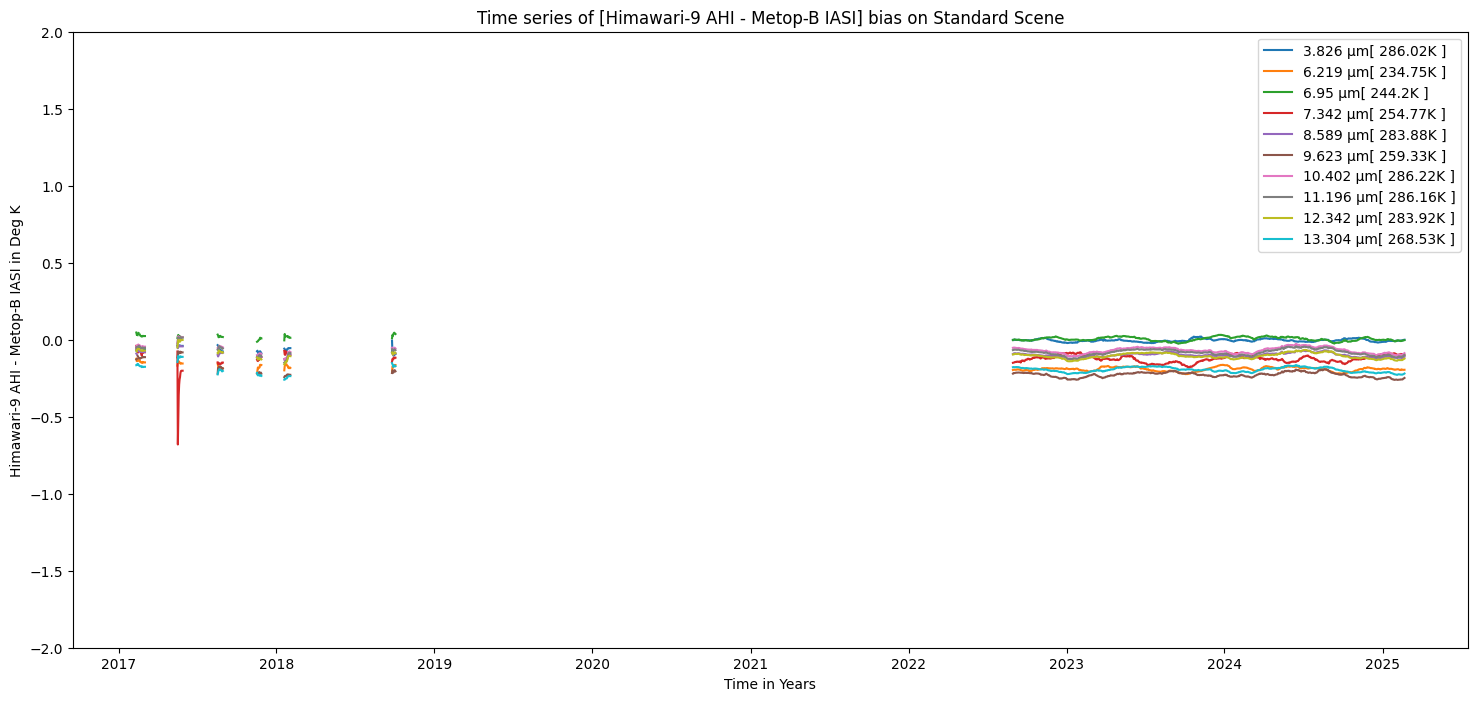

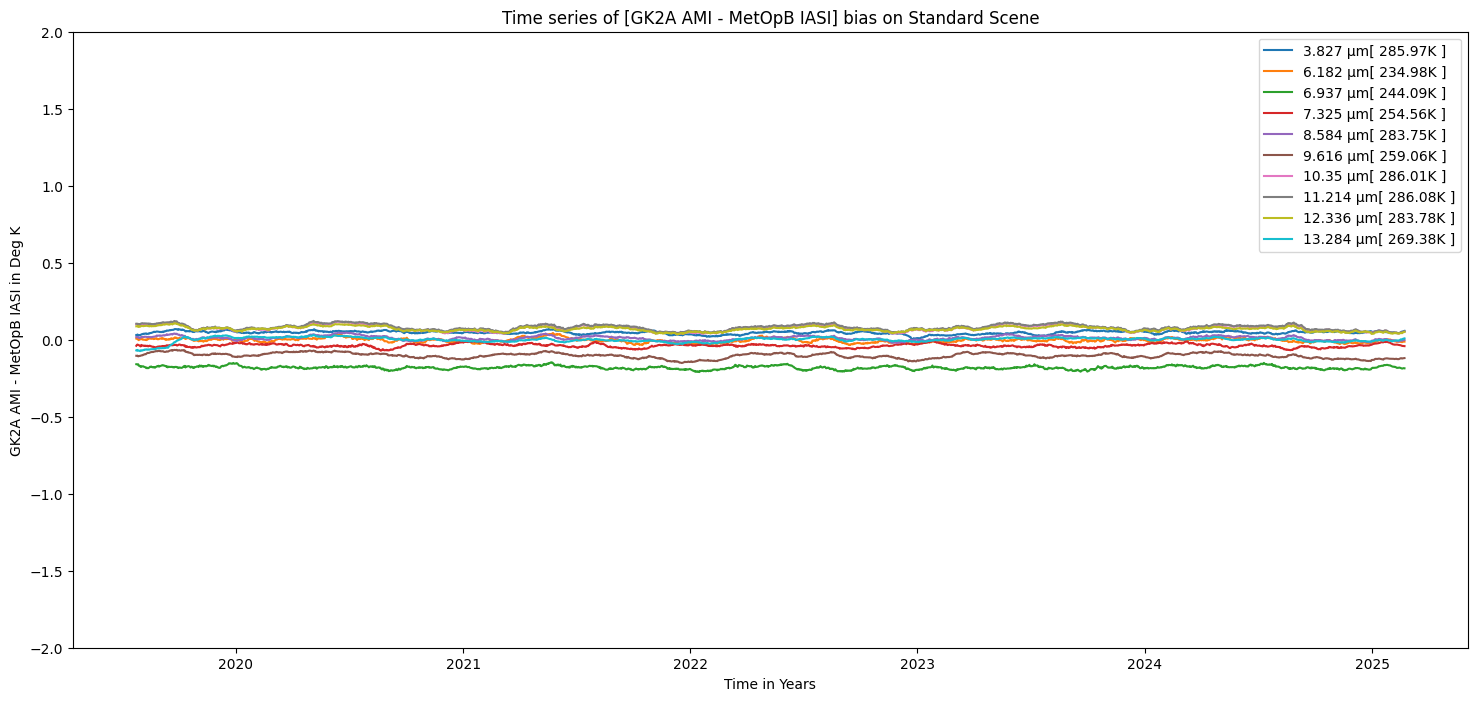

In [ ]:
#Loop over product netcdf files, extract variables and plot
# Open the GSICS netCDF file and read variables [ You can add in more]
alllist = []
tcaptions=[]
alltb_bias={}
alldrift={}
for url in fileurls:
  print(url)
  url1, nc_file=  os.path.split(url)
  urllib.request.urlretrieve(url, nc_file)
  with nc4.Dataset(nc_file,'r') as ncid:
    std_bias      = ncid.variables['std_scene_tb_bias'][:][:] # Standard Scene TB Bias
    if ('CMA' in nc_file):
      time_array    = ncid.variables['date'][:,0] #time
    else:
      time_array    = ncid.variables['date'][:] #time
    freq_array    = ncid.variables['wnc'][:] #wnc
    std_scene_tb    = ncid.variables['std_scene_tb'][:] # Scene TB
    # delta_slope    = ncid.variables['delta_slope'][:] # Slope
    # delta_offset    = ncid.variables['offset'][:] # Offset
    # reference_name    = ncid.variables['reference_name'][:] # Refname
    alpha             = ncid.variables['alpha'][:] # Alpha
    beta              = ncid.variables['beta'][:] # Beta
    br0              = ncid.variables['slope'][:] # Slope
    ar0              = ncid.variables['offset'][:] # Offset
    time_array =time_array/86400.0
  ttitle="Time series of ["+nc4.Dataset(nc_file,'r').monitored_instrument + " - " + nc4.Dataset(nc_file,'r').reference_instrument + "] bias on Standard Scene"
  if "PRIME" in (nc4.Dataset(nc_file,'r').id):
      ttitle="Time series of ["+nc4.Dataset(nc_file,'r').monitored_instrument + " - " + nc4.Dataset(nc_file,'r').reference_instrument + "] bias on Standard Scene [PRIME]"
  else:
      ttitle="Time series of ["+nc4.Dataset(nc_file,'r').monitored_instrument + " - " + nc4.Dataset(nc_file,'r').reference_instrument + "] bias on Standard Scene"
  ytitle=nc4.Dataset(nc_file,'r').monitored_instrument + " - " + nc4.Dataset(nc_file,'r').reference_instrument +" in Deg K"

#Construct a data frame with observation days in the first column
#However this has missing days and at time repeated days.
  dtime_days=pd.DataFrame(time_array.astype(int),columns=list('t'))
  std_df = pd.DataFrame(std_bias)
  std_df.columns.name = 'standard_scene_bias'

  std_df.columns=freq_array
  df_time_std_bias=[dtime_days,std_df]
  df_time_bias=pd.concat(df_time_std_bias,axis=1) # Data Frame with time information added in column

#Construct a data time series such that days are evenly placed
#However this has missing days. Fill Nan on these days. Also drop duplicate days if any

#  print(time_array[0].astype(int),time_array[-1].astype(int))
  new_index = pd.Index(np.arange(time_array[0].astype(int),time_array[-1].astype(int)), name="t")
  temp=df_time_bias.drop_duplicates(subset=['t'])

  print("MONINST",nc4.Dataset(nc_file,'r').monitored_instrument)
  df_index=temp.set_index("t")
  df_reindex=temp.set_index("t").reindex(new_index)
  df_array=df_reindex.to_numpy()

  sdate = datetime.strptime(startdate,'%Y%m%d')
  edate = datetime.strptime(enddate,'%Y%m%d')

  sdays=(datetime(sdate.year,sdate.month,sdate.day) - datetime(1970,1,1)).days
  edays=(datetime(edate.year,edate.month,edate.day) - datetime(1970,1,1)).days
  if(lifetime.lower()=='yes'):
    sdays=new_index[0]
    edays=new_index[-1]
  cf=10000/np.array(freq_array)
  cf=np.around(cf,decimals=3)
  cfreq = [[str(freq)] + [u"\u03bcm"] for freq in cf  ]
  cfreq = [ ' '.join(freq) for freq in cfreq ]
  afreq = [ ' '.join(freq) for freq in cfreq ]
  print(sdays,df_reindex.index[0],edays , df_reindex.index[-1])
  if((sdays < df_reindex.index[0]) or (edays > df_reindex.index[-1])):
    print("You Start and Enddates are outside the range of the product", startdate, enddate)
    print("Please Enter Start and End Date between",pd.to_datetime(df_reindex.index[0], unit="d"),pd.to_datetime(df_reindex.index[-1], unit="d") )
  tablecaption="["+nc4.Dataset(nc_file,'r').monitored_instrument + " - " + nc4.Dataset(nc_file,'r').reference_instrument + "]"
  sstb=pd.DataFrame(np.array(std_scene_tb).reshape(1,len(cf)), columns=cfreq)
  meandf=pd.DataFrame(df_reindex.loc[sdays:edays].mean( ).to_numpy().reshape(1,len(cf)), columns=cfreq)
  stddf=pd.DataFrame(df_reindex.loc[sdays:edays].std( ).to_numpy().reshape(1,len(cf)), columns=cfreq)
  alltb=df_reindex.loc[sdays:edays].mean( ).to_numpy().reshape(1,len(cf))[0]
  if ('MSG' in nc4.Dataset(nc_file,'r').monitored_instrument):
    print("MSGTB1",alltb)
    alltb=np.insert(alltb,2,0)
    alltb=np.insert(alltb,8,0)
    print("MSGTB2",alltb)
  alltb_bias[nc4.Dataset(nc_file,'r').monitored_instrument]=alltb

  #Calculate drift [implimented from Tim Hewison@eumetsat]
  driftdf=pd.DataFrame(np.array([np.polyfit(df_index.loc[sdays:edays].index.to_numpy(), df_index.loc[sdays:edays].to_numpy()[:,i] , 1)[0]*365.24 for i in range(len(cf)) ] ).reshape(1,len(cf)), columns=cfreq)
  adrift=driftdf.to_numpy()[0]
  if ('MSG' in nc4.Dataset(nc_file,'r').monitored_instrument):
    print("DRIFT1",adrift)
    adrift=np.insert(adrift,2,0)
    adrift=np.insert(adrift,8,0)
#    print("sdays,edays", sdays,edays,df_index.loc[sdays:edays])
    print("DRIFT2",alldrift)
  alldrift[nc4.Dataset(nc_file,'r').monitored_instrument]=adrift
  sstb.rename(index={0:'Standard Scene Temp (K)'},inplace=True)
  meandf.rename(index={0:'Tb Bias (K)'},inplace=True)
  stddf.rename(index={0:'Std Dev (K)'},inplace=True)
  driftdf.rename(index={0:'Drift (K)'},inplace=True)
  tcaptions.append(tablecaption)
  meanstddf=pd.concat([sstb,meandf,stddf,driftdf])
  meanstddf.style.set_caption(tablecaption).format("{:.2}")

  print("\033[1m" + tablecaption + "\033[0m")
#  print(tablecaption)

  display(HTML(meanstddf.to_html()))
  plt.figure(figsize=(18,8))
  plt.ylim(-2, 2)
  cfreq=[ ''.join(cfreq[fr] +"[ " + str(std_scene_tb[fr])+ "K ]") for fr in range(len(cfreq))]
  days_since1970=num2pydate(df_reindex.index,'days since 1970-01-01')
  plt.plot(days_since1970,df_array)
  plt.title(ttitle)
  plt.xlabel('Time in Years')
  plt.ylabel(ytitle)
  plt.legend(cfreq)
  alllist.append(meanstddf)
#  print(meandf.to_markdown())




```
# This is formatted as code
```




In [ ]:
import os
import urllib.request
import netCDF4 as nc4
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

alllist = []
tcaptions = []
alltb_bias = {}
alldrift = {}

for url in fileurls:
    print(url)
    url1, nc_file = os.path.split(url)
    urllib.request.urlretrieve(url, nc_file)

    with nc4.Dataset(nc_file, 'r') as ncid:
        std_bias = ncid.variables['std_scene_tb_bias'][:][:]
        time_array = ncid.variables['date'][:,0] if ('CMA' in nc_file) else ncid.variables['date'][:]
        freq_array = ncid.variables['wnc'][:]
        std_scene_tb = ncid.variables['std_scene_tb'][:]
        alpha = ncid.variables['alpha'][:]
        beta = ncid.variables['beta'][:]
        br0 = ncid.variables['slope'][:]
        ar0 = ncid.variables['offset'][:]
        time_array = time_array / 86400.0  # Convert time to days

    monitored_instr = nc4.Dataset(nc_file, 'r').monitored_instrument
    reference_instr = nc4.Dataset(nc_file, 'r').reference_instrument

    print("MONINST", monitored_instr)

    # Construct DataFrame
    dtime_days = pd.DataFrame(time_array.astype(int), columns=['t'])
    std_df = pd.DataFrame(std_bias, columns=freq_array)
    df_time_bias = pd.concat([dtime_days, std_df], axis=1)

    # Create an evenly spaced time series with NaN filling for missing days
    new_index = pd.Index(np.arange(time_array[0].astype(int), time_array[-1].astype(int)), name="t")
    temp = df_time_bias.drop_duplicates(subset=['t'])
    df_index = temp.set_index("t")
    df_reindex = df_index.reindex(new_index)

    # Convert Start and End dates to days since 1970
    sdate = datetime.strptime(startdate, '%Y%m%d')
    edate = datetime.strptime(enddate, '%Y%m%d')
    sdays = (sdate - datetime(1970, 1, 1)).days
    edays = (edate - datetime(1970, 1, 1)).days

    if lifetime.lower() == 'yes':
        sdays = new_index[0]
        edays = new_index[-1]

    cf = 10000 / np.array(freq_array)
    cf = np.around(cf, decimals=3)
    cfreq = [f"{freq} µm" for freq in cf]

    print(sdays, df_reindex.index[0], edays, df_reindex.index[-1])

    if (sdays < df_reindex.index[0]) or (edays > df_reindex.index[-1]):
        print("⚠️ You Start and End dates are outside the product range", startdate, enddate)
        print("Please Enter Start and End Date between",
              pd.to_datetime(df_reindex.index[0], unit="d"),
              pd.to_datetime(df_reindex.index[-1], unit="d"))

    # Compute Mean Bias over the selected time range
    mean_tb_bias = df_reindex.loc[sdays:edays].mean().to_numpy().flatten()

    if 'MSG' in monitored_instr:
        print("MSGTB1", mean_tb_bias)
        mean_tb_bias = np.insert(mean_tb_bias, 2, 0)
        mean_tb_bias = np.insert(mean_tb_bias, 8, 0)
        print("MSGTB2", mean_tb_bias)

    alltb_bias[monitored_instr] = mean_tb_bias

    # Ensure `cfreq` matches `mean_tb_bias`
    if len(mean_tb_bias) != len(cfreq):
        print(f"⚠️ Warning: Size Mismatch! mean_tb_bias has {len(mean_tb_bias)} elements, cfreq has {len(cfreq)} elements.")
        cfreq = cfreq[:len(mean_tb_bias)]

    # Compute Drift (Handling NaNs)
    if sdays in df_index.index and edays in df_index.index:
        time_values = df_index.loc[sdays:edays].index.to_numpy()
        bias_values = df_index.loc[sdays:edays].to_numpy()

        # Check for NaN values before computing drift
        if np.isnan(bias_values).all():
            print(f"⚠️ Warning: All NaN values in bias for {monitored_instr}")
            adrift = np.full(len(cf), np.nan)  # Fill with NaNs
        else:
            # Compute drift using polyfit (linear trend)
            adrift = np.array([
                np.polyfit(time_values, bias_values[:, i], 1)[0] * 365.24
                if not np.isnan(bias_values[:, i]).all() else np.nan
                for i in range(len(cf))
            ])

    else:
        print(f"⚠️ Warning: sdays {sdays} or edays {edays} not in index")
        adrift = np.full(len(cf), np.nan)  # Fill with NaNs

    # Ensure `adrift` shape is consistent
    adrift = adrift.flatten()

    if 'MSG' in monitored_instr:
        adrift = np.insert(adrift, 2, 0)
        adrift = np.insert(adrift, 8, 0)

    alldrift[monitored_instr] = adrift

    # Create DataFrames for Output



http://gsics.eumetsat.int/thredds/fileServer/msg2-seviri-metopb-iasi-oper-rac/W_XX-EUMETSAT-Darmstadt,SATCAL+RAC+GEOLEOIR,MSG2+SEVIRI-MetOpB+IASI_C_EUMG_20130110000000_01.nc
MONINST MSG2 SEVIRI
19723 15715 20088 20142
MSGTB1 [ 0.48925218 -0.12096404  0.0595444  -0.05481915 -0.1756114  -0.01768047
 -0.04706062 -0.9907107 ]
MSGTB2 [ 0.48925218 -0.12096404  0.          0.0595444  -0.05481915 -0.1756114
 -0.01768047 -0.04706062  0.         -0.9907107 ]
⚠️ Warning: Size Mismatch! mean_tb_bias has 10 elements, cfreq has 8 elements.
http://gsics.eumetsat.int/thredds/fileServer/msg3-seviri-metopb-iasi-oper-rac/W_XX-EUMETSAT-Darmstadt,SATCAL+RAC+GEOLEOIR,MSG3+SEVIRI-MetOpB+IASI_C_EUMG_20130110000000_01.nc
MONINST MSG3 SEVIRI
19723 15715 20088 20142
MSGTB1 [ 0.6408625  -0.18273081  0.05696792 -0.06909699  0.00738819  0.02014335
  0.00419039 -0.8591434 ]
MSGTB2 [ 0.6408625  -0.18273081  0.          0.05696792 -0.06909699  0.00738819
  0.02014335  0.00419039  0.         -0.8591434 ]
⚠️ Warning: Si

In [ ]:
print(alldrift)

{'MSG2 SEVIRI': array([-0.09456848, -0.20307854,  0.        , -0.16764066, -0.06496769,
       -0.22979919, -0.07866112, -0.08167953,  0.        , -0.24312589]), 'MSG3 SEVIRI': array([-0.01199152, -0.08501918,  0.        , -0.0694664 ,  0.02876263,
        0.00723493, -0.01264484, -0.01991723,  0.        , -0.11558261]), 'MSG4 SEVIRI': array([nan, nan,  0., nan, nan, nan, nan, nan,  0., nan]), 'Himawari-9 AHI': array([-0.00111708, -0.01996747, -0.02888838, -0.01870162, -0.00806399,
       -0.00872981, -0.00230981,  0.00276245, -0.00133153, -0.00656931]), 'GK2A AMI': array([ 0.0002086 , -0.02362618, -0.01916493, -0.03004502, -0.02263161,
       -0.03984463, -0.01306424, -0.0192993 , -0.0173764 , -0.02163696])}


In [ ]:
alldf=pd.concat(alllist,axis=1,keys=tcaptions)
alldf.style.format('{:.2f}')
#display(alldf.style.set_caption(tablecaption).format("{2:.2}"))
#meanstddf

In [ ]:
from IPython.display import display, HTML
print(std_scene_tb)
display(HTML(alldf.to_html()))

[285.97 234.98 244.09 254.56 283.75 259.06 286.01 286.08 283.78 269.38]


In [ ]:
#alllist[1]
alldf

[MSG2 SEVIRI - MetOpB IASI]                          \
                                           3.893 μm    6.248 μm    7.351 μm   
Standard Scene Temp (K)                  284.000000  236.000000  255.000000   
Tb Bias (K)                                0.489252   -0.120964    0.059544   
Std Dev (K)                                0.045936    0.103603    0.092371   
Drift (K)                                 -0.094568   -0.203079   -0.167641   

                                                                         \
                           8.706 μm    9.659 μm   10.733 μm   11.955 μm   
Standard Scene Temp (K)  284.000000  261.000000  286.000000  285.000000   
Tb Bias (K)               -0.054819   -0.175611   -0.017680   -0.047061   
Std Dev (K)                0.046481    0.108452    0.044679    0.049339   
Drift (K)                 -0.064968   -0.229799   -0.078661   -0.081680   

                                    [MSG3 SEVIRI - MetOpB IASI]              \
                          13.302 μm                    3.925 μm    6.267 μm   
Standard Scene Temp (K)  267.000000                  284.000000  236.000000   
Tb Bias (K)               -0.990711                    0.640863   -0.182731   
Std Dev (K)                0.100930                    0.012499    0.043379   
Drift (K)                 -0.243126                   -0.011992   -0.085019   

                         ... [GK2A AMI - MetOpB IASI]                          \
                         ...                 3.827 μm    6.182 μm    6.937 μm   
Standard Scene Temp (K)  ...               285.970001  234.979996  244.089996   
Tb Bias (K)              ...                 0.048472   -0.004025   -0.178652   
Std Dev (K)              ...                 0.006398    0.012257    0.010351   
Drift (K)                ...                 0.000209   -0.023626   -0.019165   

                                                                         \
                           7.325 μm    8.584 μm    9.616 μm    10.35 μm   
Standard Scene Temp (K)  254.559998  283.750000  259.059998  286.010010   
Tb Bias (K)               -0.039029    0.009428   -0.105262    0.072612   
Std Dev (K)                0.012616    0.012131    0.016267    0.014892   
Drift (K)                 -0.030045   -0.022632   -0.039845   -0.013064   

                                                             
                          11.214 μm   12.336 μm   13.284 μm  
Standard Scene Temp (K)  286.079987  283.779999  269.380005  
Tb Bias (K)                0.078746    0.066086    0.000033  
Std Dev (K)                0.015137    0.011937    0.009248  
Drift (K)                 -0.019299   -0.017376   -0.021637  

[4 rows x 44 columns]

### **ADD GK2A Biases**

In [ ]:
!pip install gdown

import gdown
import zipfile
import os

file_id = '1OKuUlwI3_xC_KD0pU6VAH5ONPzTawbNu'
# Download the zip file
url = f'https://drive.google.com/uc?id={file_id}'
output = '/content/zip_file.zip'
gdown.download(url, output, quiet=False)
destination_folder = '/content/extracted_files'

# Extract the contents
with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall(destination_folder)

Downloading...
From: https://drive.google.com/uc?id=1OKuUlwI3_xC_KD0pU6VAH5ONPzTawbNu
To: /content/zip_file.zip
100%|██████████| 139k/139k [00:00<00:00, 46.3MB/s]


In [ ]:
import pandas as pd

csv_files = [file for file in os.listdir(destination_folder) if file.startswith('IASI')]
gkfreq={ 'IR1':'3.8316μm', 'IR2':'6.2104μm', 'IR3':'6.9413μm', 'IR4':'7.3266μm',   'IR5':'8.5881μm', 'IR6':'9.621μm',  'IR7':'10.3539μm', 'IR8':'11.2288μm', 'IR9':'12.3664μm', 'IR10':'13.2908μm'}
chanid=['IR1','IR2','IR3','IR4','IR5','IR6','IR7','IR8','IR9','IR10']
gk2a_drift={}
gk2a_mean_bias={}
for csv_file in csv_files:
#    print(csv_file.split('_')[2])
    file_path = os.path.join(destination_folder, csv_file)
    dfgk2a = pd.read_csv(file_path,header=None).iloc[:, 0].str.split(expand=True)
#    print(dfgk2a.iloc[:,6].astype(float).mean())
#    pd.DataFrame(np.array([np.polyfit(dfgk2a.loc[sdays:edays].index.to_numpy(), dfgk2a.loc[sdays:edays].to_numpy()[:,i] , 1)[0]*365.24 for i in range(len(gkfreq)) ] ).reshape(1,len(cf)), columns=gkfreq)
    gk2a_drift[csv_file.split('_')[2]]=np.polyfit(list(dfgk2a.index ), dfgk2a.iloc[:,6].astype(float) , 1)[0]*365.24
    gk2a_mean_bias[csv_file.split('_')[2]]=dfgk2a.iloc[:,6].astype(float).mean()
    print(f"Contents of {csv_file}:")
gk2a_drift=[gk2a_drift[ci] for ci in chanid]
gk2a_mean_bias=[gk2a_mean_bias[ci] for ci in chanid]

Contents of IASI_B_IR10_daily_stt_SDRA_new.txt:
Contents of IASI_B_IR9_daily_stt_SDRA_new.txt:
Contents of IASI_B_IR2_daily_stt_SDRA_new.txt:
Contents of IASI_B_IR5_daily_stt_SDRA_new.txt:
Contents of IASI_B_IR8_daily_stt_SDRA_new.txt:
Contents of IASI_B_IR4_daily_stt_SDRA_new.txt:
Contents of IASI_B_IR3_daily_stt_SDRA_new.txt:
Contents of IASI_B_IR6_daily_stt_SDRA_new.txt:
Contents of IASI_B_IR7_daily_stt_SDRA_new.txt:
Contents of IASI_B_IR1_daily_stt_SDRA_new.txt:


In [ ]:
#np.array(gk2a_drift)
alltb_bias['GK2A']=np.array(gk2a_mean_bias)
alldrift['GK2A'] = np.array(gk2a_drift)

In [ ]:
alldrift

{'MSG2 SEVIRI': array([-0.06714148, -0.14472926,  0.        , -0.16613075, -0.06484932,
        -0.19315126, -0.08332838, -0.07869612,  0.        , -0.23535668]),
 'MSG3 SEVIRI': array([ 0.11912522,  0.04616598,  0.        ,  0.04822391,  0.01920646,
        -0.0137428 , -0.00050086,  0.05553423,  0.        , -0.00115251]),
 'MSG4 SEVIRI': array([-0.05990852, -0.14845361,  0.        , -0.14296935,  0.15367249,
        -0.03439706, -0.01926279, -0.06159645,  0.        , -0.41012208]),
 'Himawari-9 AHI': array([ 0.01666947, -0.00898568, -0.00033818, -0.05348387,  0.0190633 ,
         0.02364453,  0.02409989,  0.02707758,  0.01604043,  0.01612881]),
 'GK2A AMI': array([ 0.03451863,  0.00941761,  0.00333948, -0.01595262,  0.00586227,
         0.00310675,  0.00483491,  0.00128735,  0.0021106 ,  0.01288878]),
 'GK2A': array([-0.01008755,  0.01181343, -0.00641153, -0.00895829, -0.0120571 ,
         0.03874172,  0.04883042,  0.0404563 ,  0.02829072,  0.01859249])}

In [ ]:
fileurls

['http://gsics.eumetsat.int/thredds/fileServer/msg2-seviri-metopb-iasi-oper-rac/W_XX-EUMETSAT-Darmstadt,SATCAL+RAC+GEOLEOIR,MSG2+SEVIRI-MetOpB+IASI_C_EUMG_20130110000000_01.nc',
 'http://gsics.eumetsat.int/thredds/fileServer/msg3-seviri-metopb-iasi-oper-rac/W_XX-EUMETSAT-Darmstadt,SATCAL+RAC+GEOLEOIR,MSG3+SEVIRI-MetOpB+IASI_C_EUMG_20130110000000_01.nc',
 'http://gsics.eumetsat.int/thredds/fileServer/msg4-seviri-metopb-iasi-oper-rac/W_XX-EUMETSAT-Darmstadt,SATCAL+RAC+GEOLEOIR,MSG4+SEVIRI-MetOpB+IASI_C_EUMG_20150601000000_01.nc',
 'http://gsics.eumetsat.int/thredds/fileServer/himawari9-ahi-metopb-iasi-demo-rac/W_JP-JMA-MSC,SATCAL+RAC+GEOLEOIR,Himawari9+AHI-MetopB+IASI_C_RJTD_20170128000000_demo_01.nc',
 'https://gsics.eumetsat.int/thredds/fileServer/gk2a-ami-metopb-iasi-demo-rac/W_KR-KMA-NMSC,SATCAL+RAC+GEOLEOIR,GK2A+AMI-MetopB+IASI_C_RKSL_20190725000000_demo_01.nc']

In [ ]:
# MSG Channels  3.893 μm	6.248 μm	6.95      7.351 μm	8.706 μm	9.659 μm	10.733 μm	 11.955 μm	            13.302 μm
# H-9 Channels  3.826 μm	6.219 μm	6.95 μm	  7.342 μm	8.589 μm	9.623 μm	10.402 μm	 11.196 μm	 12.342 μm	13.304 μm
# GK2A Channel  3.8316μm, 6.2104μm, 6.9413μm, 7.3266,   8.5881μm, 9.621μm,  10.3539μm, 11.2288 μm, 12.3664μm, 13.2908μm]

In [ ]:
x_labels = [f'3.8\u00B1.02μm' 	,f'6.2\u00B1.02μm',	f'6.95\u00B1.02μm',f'7.3\u00B1.02μm',	f'8.7\u00B1.2μm',f'9.6\u00B1.02μm',f'10.7\u00B1.2μm',f'11.9\u00B1.3μm',f'12.3\u00B1.02μm',f'13.3\u00B1.02μm']
#print(custom_labels)


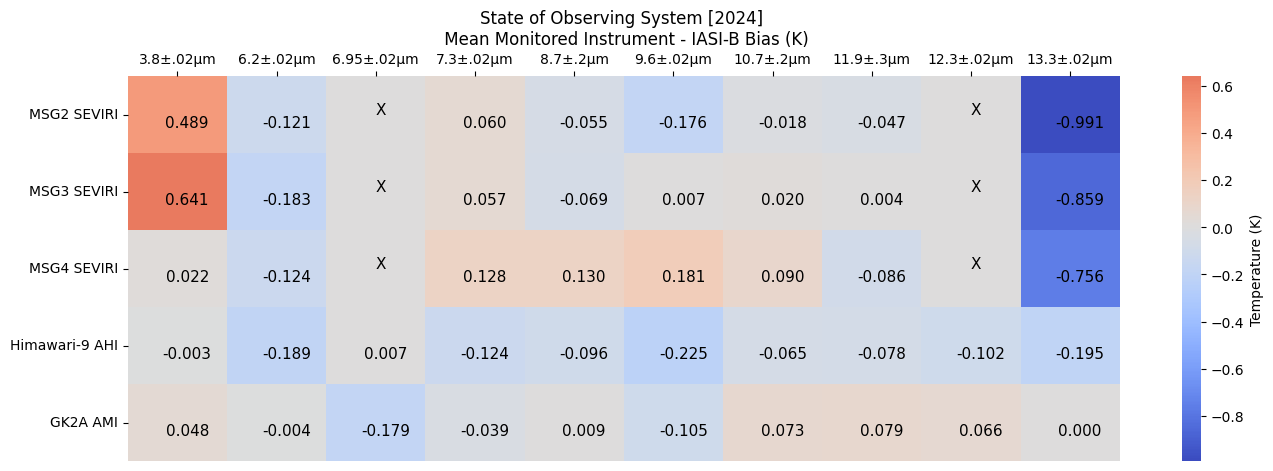

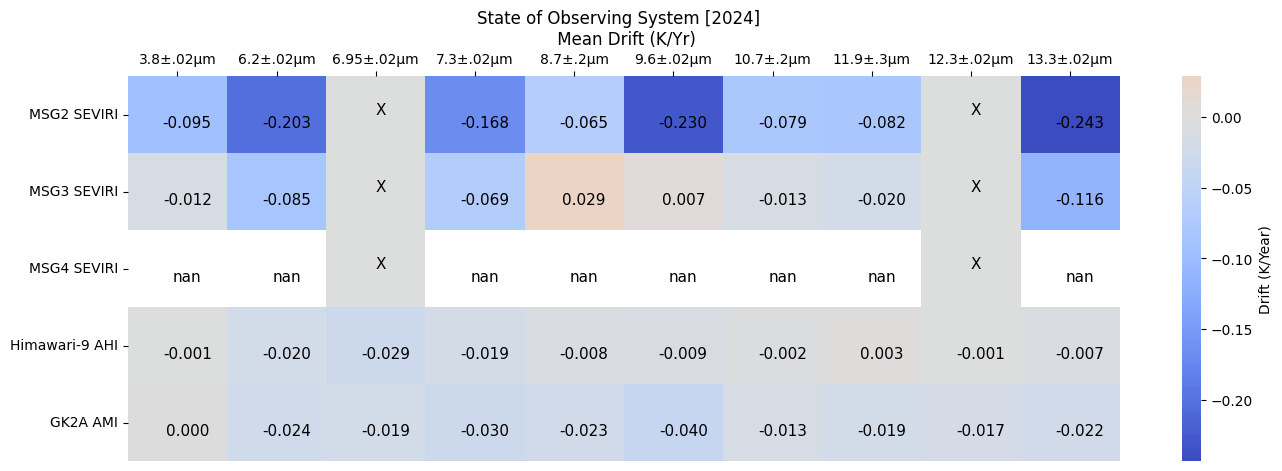

In [ ]:
import seaborn as sn
tmp=pd.DataFrame.from_dict(alltb_bias).T
drifttmp=pd.DataFrame.from_dict(alldrift).T
tmp.columns = [ostring.replace(" ", "") for ostring in afreq]
corr = pd.DataFrame(tmp)
#corr.insert(2,"6.95", [0, 0,0])
#corr.insert(2,"12.324", [0, 0,0])
plt.figure(figsize = (16,5))
#ax=sn.heatmap(corr, cmap ='RdYlGn', linewidths = 1.60)
ax=sn.heatmap(corr, cmap="coolwarm", center=0)
ax.xaxis.tick_top()
ax.set_xticklabels(x_labels, rotation=0, horizontalalignment='center')
#ax.set_xticks([0, 1, 2])
#ax.set_xticklabels(afreq)
data=corr.to_numpy()
datax = [['X' if value == 0 else value for value in row] for row in data]
for i in range(len(data)):
    for j in range(len(datax[0])):
        value = datax[i][j]
        if value == 'X':
           ax.text(j + 0.5, i + 0.5,value,fontsize=11)
#           ax.add_patch(plt.Rectangle((1- 0.5,1- 0.5), i, j, fill=True, color='white', edgecolor='black'))
           continue
        ax.text(j + 0.6, i + 0.6, f"{value:.3f}", ha='center', va='center', color='black',fontsize=11)

# Show the plot
ax.set_title('State of Observing System [2024] \n Mean Monitored Instrument - IASI-B Bias (K)')
cbar = ax.collections[0].colorbar
cbar.set_label('Temperature (K)')
plt.show()


tmp=pd.DataFrame.from_dict(alldrift).T
tmp.columns = [ostring.replace(" ", "") for ostring in afreq]
corr = pd.DataFrame(tmp)
#corr.insert(2,"6.95", [0, 0,0])
#corr.insert(2,"12.324", [0, 0,0])
plt.figure(figsize = (16,5))
#ax=sn.heatmap(corr, cmap ='RdYlGn', linewidths = 1.60)
ax=sn.heatmap(corr, cmap="coolwarm", center=0)
ax.xaxis.tick_top()
ax.set_xticklabels(x_labels, rotation=0, horizontalalignment='center')
#ax.set_xticks([0, 1, 2])
#ax.set_xticklabels(afreq)
data=corr.to_numpy()
datax = [['X' if value == 0 else value for value in row] for row in data]
for i in range(len(data)):
    for j in range(len(datax[0])):
        value = datax[i][j]
        if value == 'X':
           ax.text(j + 0.5, i + 0.5,value,fontsize=11)
#           ax.add_patch(plt.Rectangle((1- 0.5,1- 0.5), i, j, fill=True, color='white', edgecolor='black'))
           continue
        ax.text(j + 0.6, i + 0.6, f"{value:.3f}", ha='center', va='center', color='black',fontsize=11)

# Show the plot
ax.set_title('State of Observing System [2024]  \n Mean Drift (K/Yr)')
cbar = ax.collections[0].colorbar
cbar.set_label('Drift (K/Year)')
plt.show()

In [ ]:
corr

,3.827μm,6.182μm,6.937μm,7.325μm,8.584μm,9.616μm,10.35μm,11.214μm,12.336μm,13.284μm
MSG2 SEVIRI,-0.094568,-0.203079,0.000000,-0.167641,-0.064968,-0.229799,-0.078661,-0.081680,0.000000,-0.243126
MSG3 SEVIRI,-0.011992,-0.085019,0.000000,-0.069466,0.028763,0.007235,-0.012645,-0.019917,0.000000,-0.115583
MSG4 SEVIRI,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
Himawari-9 AHI,-0.001117,-0.019967,-0.028888,-0.018702,-0.008064,-0.008730,-0.002310,0.002762,-0.001332,-0.006569
GK2A AMI,0.000209,-0.023626,-0.019165,-0.030045,-0.022632,-0.039845,-0.013064,-0.019299,-0.017376,-0.021637
GK2A,-0.010088,0.011813,-0.006412,-0.008958,-0.012057,0.038742,0.048830,0.040456,0.028291,0.018592


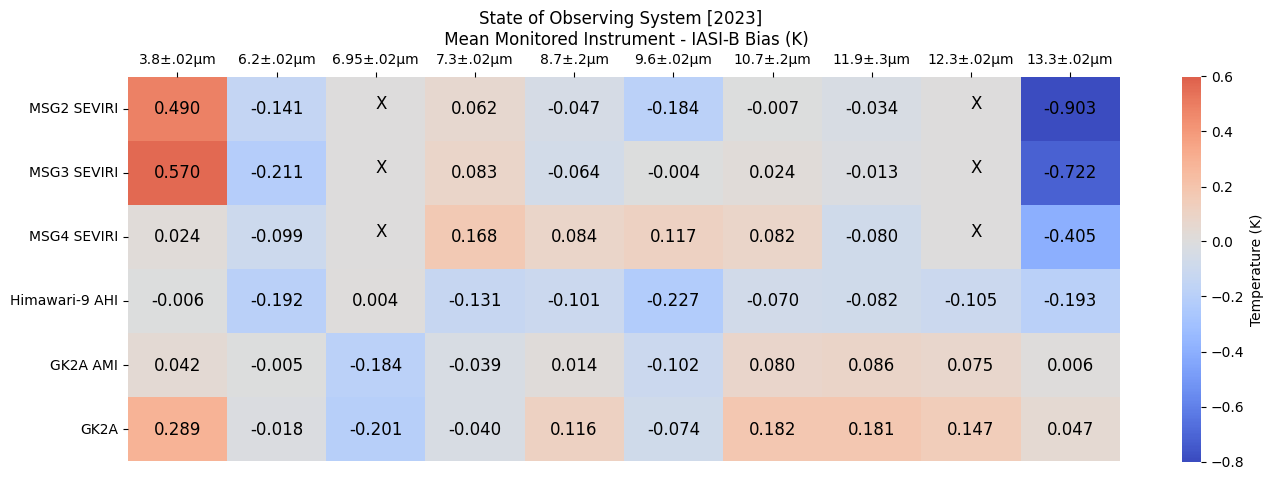

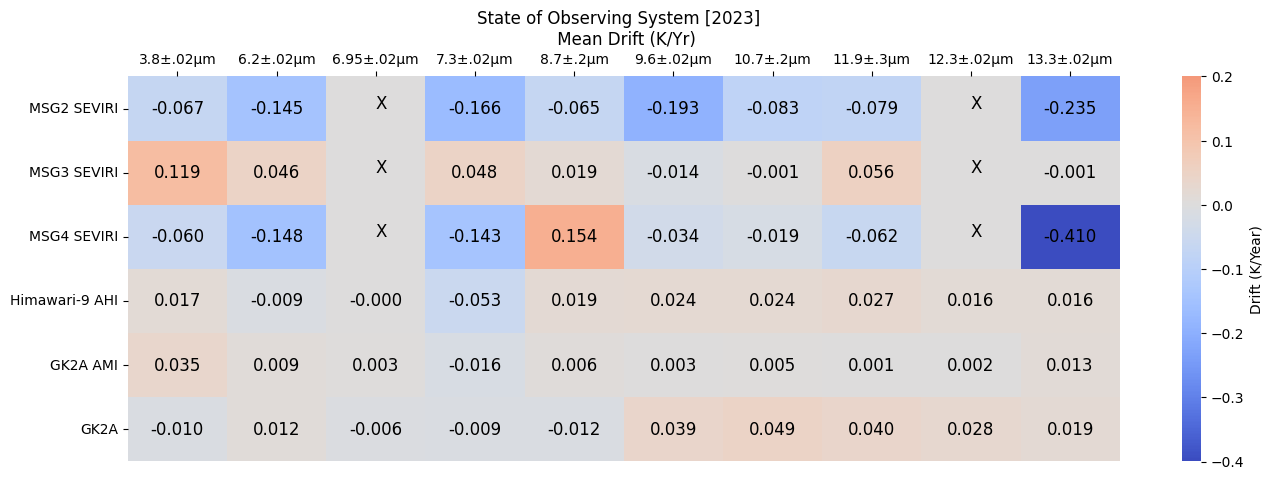

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

# Assuming alltb_bias, alldrift, afreq, and x_labels are predefined

### **Bias Monitoring Heatmap (-0.8 to 0.6)**
tmp = pd.DataFrame.from_dict(alltb_bias).T
tmp.columns = [ostring.replace(" ", "") for ostring in afreq]
corr = pd.DataFrame(tmp)

plt.figure(figsize=(16, 5))
ax = sn.heatmap(corr, cmap="coolwarm", center=0, vmin=-0.8, vmax=0.6, annot=False)  # Fixed color range
ax.xaxis.tick_top()
ax.set_xticklabels(x_labels, rotation=0, horizontalalignment='center')

data = corr.to_numpy()
datax = [['X' if value == 0 else value for value in row] for row in data]

for i in range(len(data)):
    for j in range(len(datax[0])):
        value = datax[i][j]
        if value == 'X':
            ax.text(j + 0.5, i + 0.5, value, fontsize=12)  # Adjust font size
            continue
        ax.text(j + 0.5, i + 0.5, f"{value:.3f}", ha='center', va='center', color='black', fontsize=12)

# Show the plot
ax.set_title('State of Observing System [2023] \n Mean Monitored Instrument - IASI-B Bias (K)')
cbar = ax.collections[0].colorbar
cbar.set_label('Temperature (K)')
plt.show()

### **Drift Monitoring Heatmap (-0.4 to 0.2)**
tmp = pd.DataFrame.from_dict(alldrift).T
tmp.columns = [ostring.replace(" ", "") for ostring in afreq]
corr = pd.DataFrame(tmp)

plt.figure(figsize=(16, 5))
ax = sn.heatmap(corr, cmap="coolwarm", center=0, vmin=-0.4, vmax=0.2, annot=False)  # Fixed color range
ax.xaxis.tick_top()
ax.set_xticklabels(x_labels, rotation=0, horizontalalignment='center')

data = corr.to_numpy()
datax = [['X' if value == 0 else value for value in row] for row in data]

for i in range(len(data)):
    for j in range(len(datax[0])):
        value = datax[i][j]
        if value == 'X':
            ax.text(j + 0.5, i + 0.5, value, fontsize=12)  # Adjust font size
            continue
        ax.text(j + 0.5, i + 0.5, f"{value:.3f}", ha='center', va='center', color='black', fontsize=12)

# Show the plot
ax.set_title('State of Observing System [2023]  \n Mean Drift (K/Yr)')
cbar = ax.collections[0].colorbar
cbar.set_label('Drift (K/Year)')
plt.show()


In [ ]:
import pandas as pd

# Replace 'your_file_id' with the actual file ID from the shareable link
file_id = '1xyJLVgPlTbXFmcSkh-tMQ8hV_rE7N7uG'

# Construct the download link
download_link = f'https://drive.google.com/uc?id={file_id}'

# Read the CSV file using pandas
gk2adf = pd.read_csv(download_link)
#gk2adf=[gk2adf['year']==2023]
# Now 'df' contains the data from the CSV file on Google Drive
gk2adf[gk2adf['year']==2023].describe()

,year,month,day,num_sw038,inte_sw038,inteSD_sw038,slop_sw038,slopSD_sw038,TBbiasSR_sw038,TBbiasSRSD_sw038,...,slop_ir133,slopSD_ir133,TBbiasSR_ir133,TBbiasSRSD_ir133,TBbias220_ir133,TBbias220SD_ir133,TBbias250_ir133,TBbias250SD_ir133,TBbias290_ir133,TBbias290SD_ir133
count,362.0,362.000000,362.00000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,...,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000
mean,2023.0,6.488950,15.71547,17540.259669,0.002750,0.000061,0.990828,0.000535,-0.057451,0.010865,...,0.994616,0.000203,-0.014810,0.004856,0.309540,0.010870,0.091010,0.004779,-0.112582,0.007194
std,0.0,3.442627,8.84331,3155.278271,0.000303,0.000008,0.001376,0.000047,0.035232,0.000994,...,0.000789,0.000015,0.009145,0.000538,0.055754,0.001068,0.020873,0.000438,0.016313,0.000711
min,2023.0,1.000000,1.00000,14054.000000,0.002042,0.000040,0.987307,0.000425,-0.156421,0.008571,...,0.992893,0.000170,-0.047427,0.003745,0.169410,0.007716,0.037802,0.003667,-0.145752,0.005653
25%,2023.0,4.000000,8.00000,15722.000000,0.002575,0.000055,0.989964,0.000507,-0.079937,0.010239,...,0.994024,0.000189,-0.018661,0.004471,0.271326,0.010491,0.079007,0.004473,-0.124845,0.006693
50%,2023.0,6.500000,16.00000,16790.000000,0.002740,0.000060,0.990628,0.000535,-0.057809,0.010865,...,0.994580,0.000204,-0.013414,0.004870,0.311303,0.010935,0.093105,0.004818,-0.114281,0.007233
75%,2023.0,9.000000,23.00000,18151.000000,0.002902,0.000067,0.991617,0.000570,-0.031725,0.011635,...,0.995211,0.000216,-0.008098,0.005305,0.347657,0.011653,0.103507,0.005155,-0.100119,0.007788
max,2023.0,12.000000,31.00000,31846.000000,0.003464,0.000079,0.993773,0.000635,0.005257,0.012796,...,0.996419,0.000232,-0.000844,0.005767,0.436530,0.012624,0.138065,0.005507,-0.079159,0.008327


In [ ]:
data_array= np.loadtxt('/content/drive/MyDrive/gk2a_h9_new1.csv', delimiter=",")  #
array_dict = {'Himawari-9 AHI': data_array[0], 'Gk-2A': data_array[1]}
print(array_dict)

FileNotFoundError: /content/drive/MyDrive/gk2a_h9_new1.csv not found.

In [ ]:
import seaborn as sn
tmp=pd.DataFrame.from_dict(array_dict).T
drifttmp=pd.DataFrame.from_dict(alldrift).T
tmp.columns = [ostring.replace(" ", "") for ostring in afreq]
corr = pd.DataFrame(tmp)
#corr.insert(2,"6.95", [0, 0,0])
#corr.insert(2,"12.324", [0, 0,0])
plt.figure(figsize = (16,5))
#ax=sn.heatmap(corr, cmap ='RdYlGn', linewidths = 1.60)
ax=sn.heatmap(corr, cmap="coolwarm", center=0)
ax.xaxis.tick_top()
ax.set_xticklabels(x_labels, rotation=0, horizontalalignment='center')
#ax.set_xticks([0, 1, 2])
#ax.set_xticklabels(afreq)
data=corr.to_numpy()
datax = [['X' if value == 0 else value for value in row] for row in data_array]
for i in range(len(data_array)):
    for j in range(len(data_array[0])):
        value = datax[i][j]
        if value == 'X':
           ax.text(j + 0.5, i + 0.5,value)
#           ax.add_patch(plt.Rectangle((1- 0.5,1- 0.5), i, j, fill=True, color='white', edgecolor='black'))
           continue
        ax.text(j + 0.6, i + 0.6, f"{value:.3f}", ha='center', va='center', color='black')

# Show the plot
ax.set_title('State of Observing System [2024] \n Mean Monitored Instrument - CrIS/N20 Bias (K)')
cbar = ax.collections[0].colorbar
cbar.set_label('Temperature (K)')
plt.show()



NameError: name 'array_dict' is not defined

In [ ]:
!apt-get update
!apt-get install -y chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install selenium
!pip install chromedriver-autoinstaller

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import chromedriver_autoinstaller

# Automatically download and install ChromeDriver
chromedriver_autoinstaller.install()

# Set up Chrome options
chrome_options = Options()
chrome_options.add_argument('--headless')  # Run Chrome in headless mode (no GUI)

# Create a Chrome webdriver with the configured options
driver = webdriver.Chrome(options=chrome_options)

# Now you can use the 'driver' object to automate Chrome in your Colab notebook



In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By

# Replace with the actual URL of the website
url = "https://nmsc.kma.go.kr/enhome/html/gsics/infraredSequenceGK2A.do"

# Create a new instance of the Chrome webdriver (you need to have Chrome and chromedriver installed)
driver = webdriver.Chrome()

# Open the website
driver.get(url)

# Find and click the download button using its XPath or other locator
download_button = driver.find_element(By.XPATH, "//button[contains(text(), 'Download')]")
download_button.click()

# After clicking the download button, wait for the file to be downloaded (you may need to adjust the wait time)
driver.implicitly_wait(10)

# Close the webdriver
driver.quit()